<a href="https://colab.research.google.com/github/KarthikSaravanakumarM56/24ADI003-24BAD056/blob/main/SCENARIO_1_EXP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance.csv


24BAD056 - M.Karthik Saravanakumar
MSE: 210.148421936329
RMSE: 14.496496884983246
R2 Score: 0.01967725096281825
                       Feature  Coefficient
0          study hours per day     0.251564
1        attendance percentage     0.295295
2  parental level of education    -0.997153
3      test preparation course    -3.839399
4                  sleep hours    -0.216939


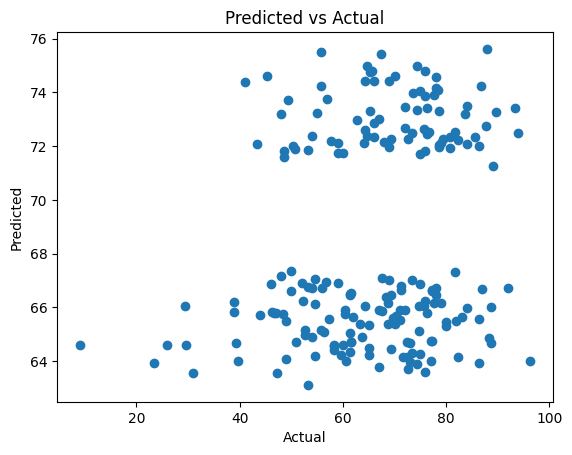

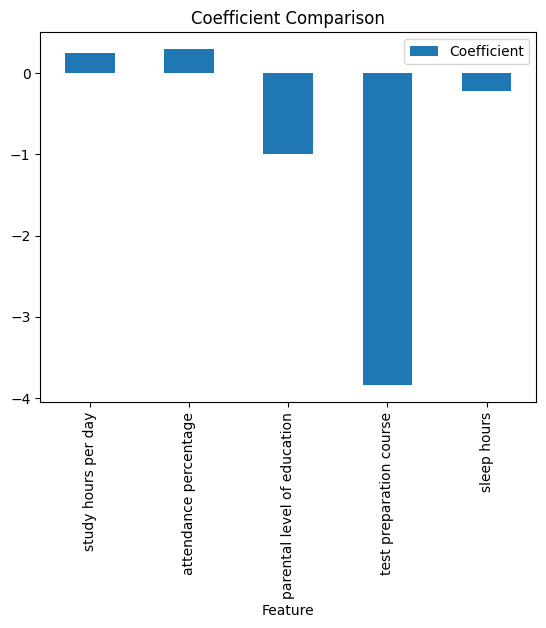

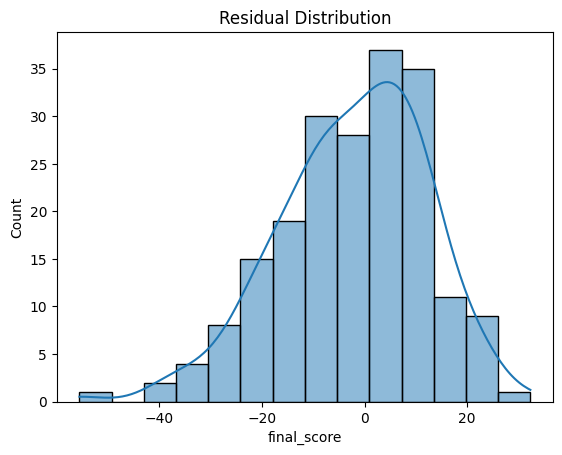

In [2]:
print("24BAD056 - M.Karthik Saravanakumar")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("StudentsPerformance.csv")

le = LabelEncoder()
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

df['final_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

df['study hours per day'] = np.random.randint(1,6,len(df))
df['attendance percentage'] = np.random.randint(60,100,len(df))
df['sleep hours'] = np.random.randint(4,9,len(df))

X = df[['study hours per day','attendance percentage',
        'parental level of education','test preparation course',
        'sleep hours']]

y = df['final_score']

X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(
    X_scaled,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))

coeff_df = pd.DataFrame({
    "Feature":X.columns,
    "Coefficient":model.coef_
})
print(coeff_df)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

coeff_df.set_index("Feature").plot(kind="bar")
plt.title("Coefficient Comparison")
plt.show()

sns.histplot(y_test - y_pred,kde=True)
plt.title("Residual Distribution")
plt.show()
